In [95]:
from dm_den import analyze
from scipy.stats.stats import pearsonr
from adjustText import adjust_text
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import rcParams

rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.grid']=True
rcParams['axes.titlesize']=24
rcParams['axes.labelsize']=20
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=18

In [49]:
import importlib
import dm_den
importlib.reload(dm_den)
analyze=dm_den.analyze

In [3]:
def build_direcs(gal, res):
    res=str(res)
    hdirec='/data17/grenache/aalazar/FIRE/GVB/m12'+gal+'_res'+res+\
          '/halo/rockstar_dm/hdf5/halo_600.hdf5'
    direc='/data17/grenache/aalazar/FIRE/GVB/m12'+gal+'_res'+res+\
          '/output/hdf5/'
    return hdirec, direc

In [33]:
def get_data(gals,ress,host_keys=None):
    dat=[]
    assert len(gals)==len(ress)
    if host_keys is None:
        host_keys=['host.index']*len(gals)
    for g,r,host_key in zip(gals, ress, host_keys):
        print('Retrieving m12'+g)
        #hdirec,direc=build_direcs(g,r)
        dat+=[analyze(g,r,host_key=host_key)]
    return dat

In [34]:
gals = 'bcfimrwz'
ress = [7100,7100,7100,7100,7100,7100,7100,4200]
dat=get_data(gals,ress)

Retrieving m12b


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


Retrieving m12c


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


Retrieving m12f


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


Retrieving m12i


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


Retrieving m12m


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


Retrieving m12r


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


Retrieving m12w


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


Retrieving m12z


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


In [30]:
gals_elvis=['_elvis_RomeoJuliet',
            '_elvis_RomeoJuliet',
            '_elvis_RomulusRemus',
            '_elvis_RomulusRemus',
            '_elvis_ThelmaLouise',
            '_elvis_ThelmaLouise']
ress_elvis=[3500,3500,4000,4000,4000,4000]
host_keys_elvis=['host.index','host2.index']*3
dat_elvis=get_data(gals_elvis, ress_elvis, host_keys_elvis)

Retrieving m12_elvis_RomeoJuliet


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


Retrieving m12_elvis_RomeoJuliet


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


Retrieving m12_elvis_RomulusRemus


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


Retrieving m12_elvis_RomulusRemus


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


Retrieving m12_elvis_ThelmaLouise


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


Retrieving m12_elvis_ThelmaLouise


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


In [63]:
#fixing dat_elvis
#dat_jul=get_data(['_elvis_RomeoJuliet'], [3500], ['host2.index'])
#dat_elvis[1]=dat_jul[0]
#dat_elvis=list(dat_elvis)
#dat=list(dat)

In [36]:
gals_all=[*gals,*gals_elvis]

In [64]:
dat_all=dat+dat_elvis
dat=np.array(dat)
dat_all=np.array(dat_all)

In [69]:
gal_names=['m12' + g for g in gals]
gal_names_all=gal_names+['Romeo','Juliet',
                         'Remus','Romulus',
                         'Thelma','Louise']

In [67]:
for g,f in zip(gal_names_all,10**7./dat_all[:,0]):
    print('f('+g+'): {0:0.2f}'.format(f))

f(m12b): 0.99
f(m12c): 1.28
f(m12f): 1.01
f(m12i): 1.28
f(m12m): 0.89
f(m12r): 1.77
f(m12w): 1.29
f(m12z): 2.01
f(Romeo): 1.00
f(Juliet): 1.31
f(Remus): 1.00
f(Romulus): 1.10
f(Thelma): 1.17
f(Louise): 1.42


In [87]:
def plotter(gals, dat, gal_names, datloc, ylabel,
            yscale='linear', adjustment=None, figsize=(7,8)):
    fig=plt.figure(figsize=figsize)
    ax=fig.add_subplot(111)
    texts=[] #make a container for labels that adjust_text will tune
    for d,g,name in zip(dat, gals, gal_names):
        y=d[datloc]
        if adjustment=='log':
            y=np.log10(y)
        elif adjustment is None:
            pass
        else:
            raise ValueError
        x=np.log10(d[0])
        ax.plot(x,y,'bo',label='m12'+g)
        #add annotation to texts
        texts+=[ax.annotate(name,(x*1.001,y*1.0001), fontsize=14)]
    ax.set_xlabel('$\log\;\\rho(R_0)\:[\,\log(\mathrm{M}_\odot'\
                  '\mathrm{kpc}^{-3})\,]$')
    ax.set_ylabel(ylabel)
    ax.set_yscale(yscale)
    ax.grid(True,which='both')
    
    if adjustment=='log':
        corr=pearsonr(np.log10(dat[:,datloc]),dat[:,0])
    else:
        corr=pearsonr(dat[:,datloc],dat[:,0])
    ax.annotate('corr$\,={0:0.2f}$'.format(corr[0]),
                (0,-0.2),
                xycoords='axes fraction',
                fontsize=15)
    adjust_text(texts)
    #ax.legend(bbox_to_anchor=(1.04,0.5), loc='center left')
    plt.show()

In [93]:
disp_label='$\sigma(R_\mathrm{vir})\ [\,\mathrm{km}\cdot\mathrm{s}^{-1}\,]$'
m_label='$M_\mathrm{vir}\ [\mathrm{M}_\odot]$'
log_rho_label='$\log(\,\\rho(R_\mathrm{vir})\,)\;[\,\log(\mathrm{M}_\odot\mathrm{kpc}^{-3})\,]$'
rho_label='$\\rho(R_\mathrm{vir})\;[\,\mathrm{M}_\odot\mathrm{kpc}^{-3}\,]$'

def make_plot_feed(gd):
    feed=[{**gd,
           'datloc':3,
           'ylabel':disp_label,
           'yscale':'linear'},
          {**gd,
           'datloc':4,
           'ylabel':m_label,
           'yscale':'log'},
          {**gd,
           'datloc':1,
           'ylabel':log_rho_label,
           'yscale':'linear',
           'adjustment':'log'},
          {**gd,
           'datloc':1,
           'ylabel':rho_label,
           'yscale':'linear',
           'adjustment':None}]
    return feed

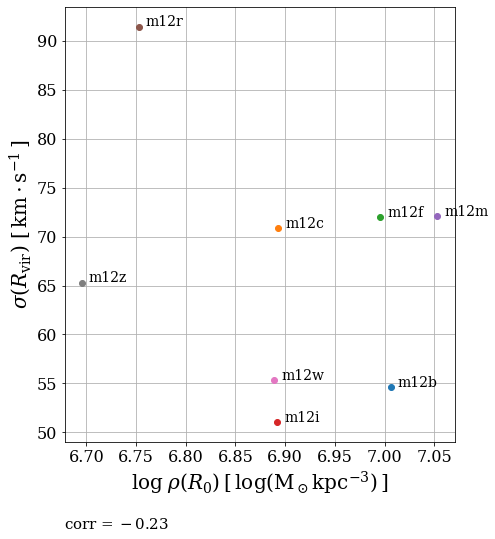

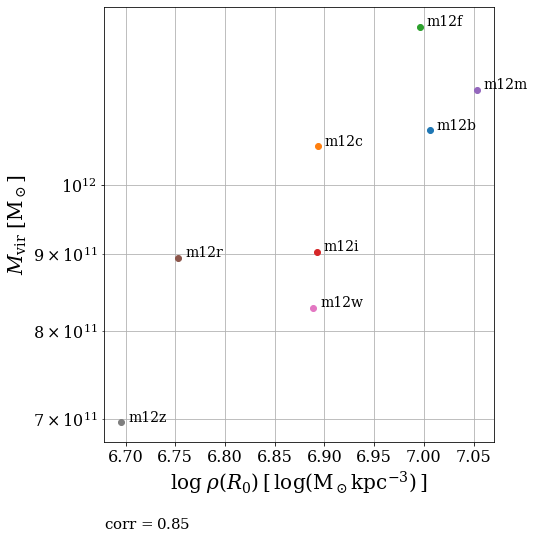

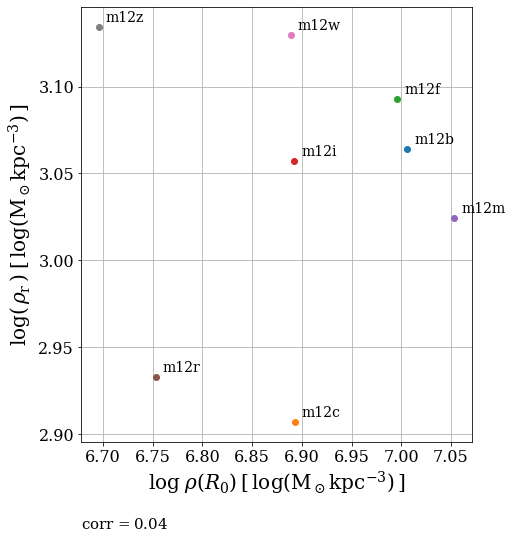

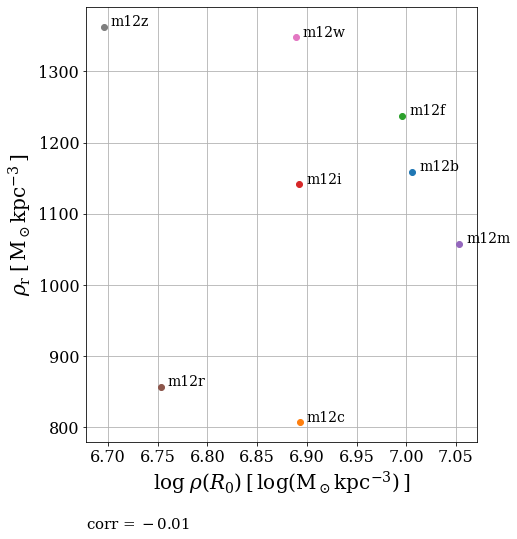

In [77]:
gd={'gals':gals, 'dat':dat, 'gal_names':gal_names}
for f in make_plot_feed(gd):
    plotter(**f)

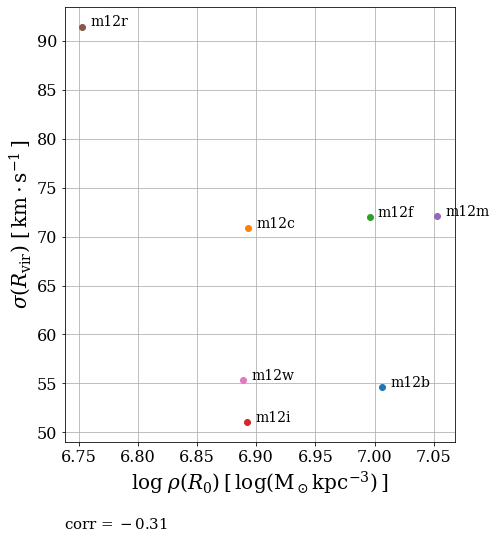

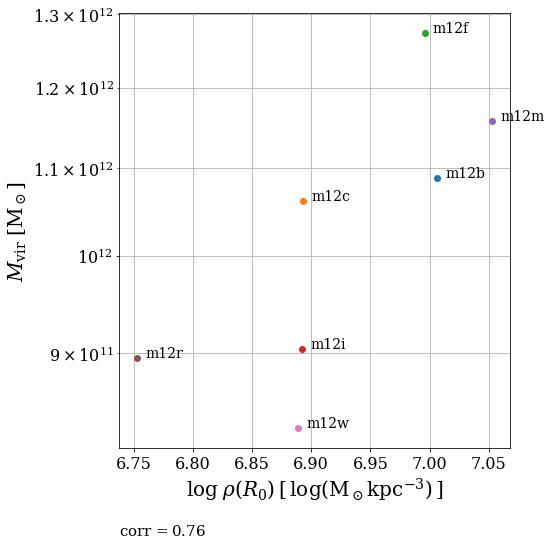

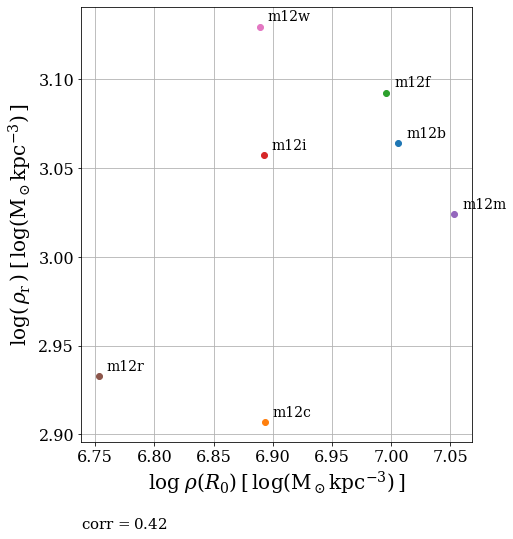

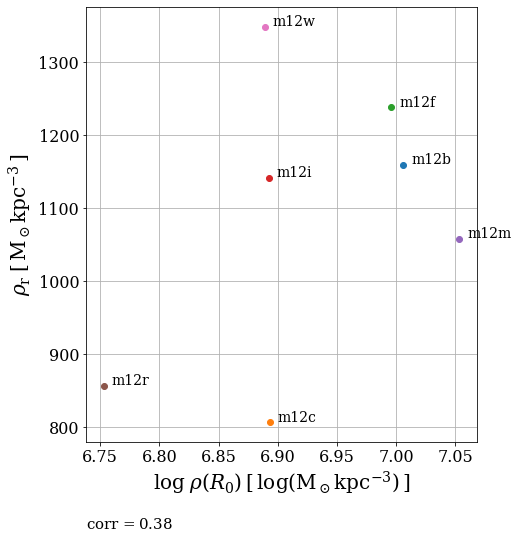

In [74]:
gals_cut=gals[:-1]
dat_cut=dat[:-1]
names_cut=gal_names[:-1]
for f in make_plot_feed({'gals':gals_cut, 'dat':dat_cut, 'gal_names':names_cut}):
    plotter(**f)

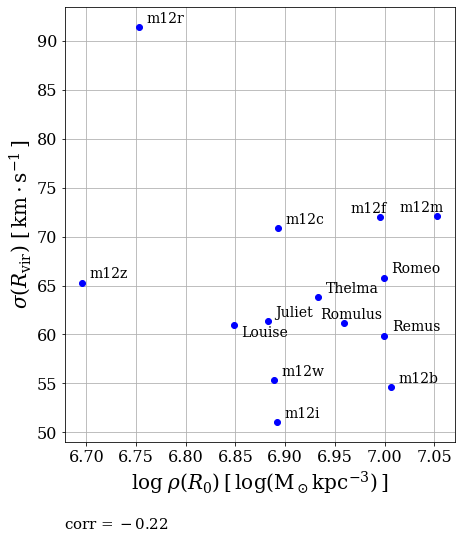

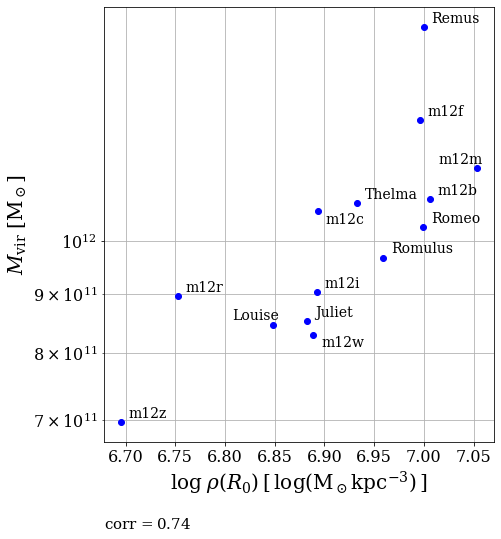

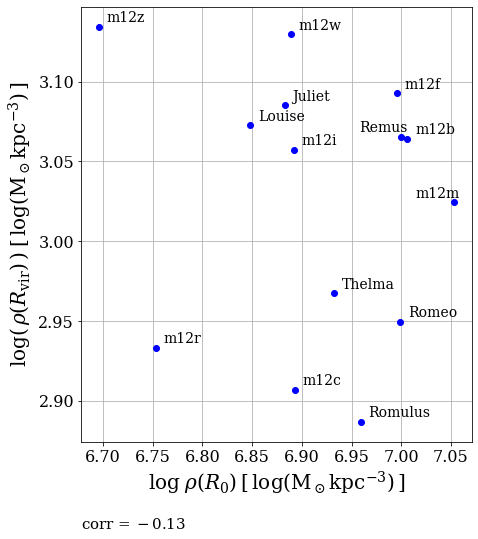

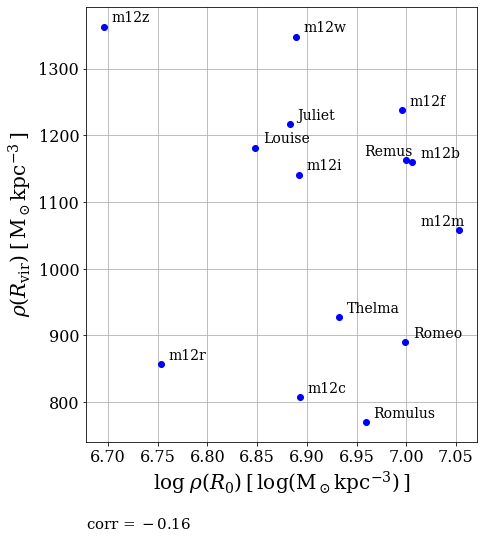

In [94]:
gd_all={'gals':gals_all, 'dat':dat_all, 'gal_names':gal_names_all}
for f in make_plot_feed(gd_all):
    plotter(**f)

# Saving the data

In [110]:
df=pd.DataFrame(index=gal_names_all,
                data=dat_all,
                columns=['den_solar','den_vir','disp_solar','disp_vir','mvir_fromhcat','mvir_calc'])

In [112]:
df

,den_solar,den_vir,disp_solar,disp_vir,mvir_fromhcat,mvir_calc
m12b,1.014134e+07,1159.321434,155.290268,54.605900,1.087521e+12,1.216452e+12
m12c,7.818440e+06,807.198953,148.470139,70.848709,1.061268e+12,1.165302e+12
m12f,9.905226e+06,1237.727634,165.068008,71.989967,1.273889e+12,1.433798e+12
m12i,7.802997e+06,1141.293685,139.492889,51.059090,9.037037e+11,1.004280e+12
m12m,1.129913e+07,1057.713174,162.525116,72.091522,1.157137e+12,1.298088e+12
m12r,5.663378e+06,857.061230,131.574112,91.421043,8.952206e+11,9.840295e+11
m12w,7.742437e+06,1348.057354,132.349716,55.312267,8.295441e+11,9.378701e+11
m12z,4.964839e+06,1362.825933,104.129013,65.305946,6.965137e+11,8.009128e+11
Romeo,9.981439e+06,890.395766,160.362564,65.811241,1.028456e+12,1.110623e+12
Juliet,7.631793e+06,1216.703431,129.952454,61.409374,8.526029e+11,9.437839e+11


In [113]:
df.to_hdf('dm_den_20210622.h5',index=True,key='df')

In [114]:
df2=pd.read_hdf('dm_den_20210622.h5')

In [115]:
df2

,den_solar,den_vir,disp_solar,disp_vir,mvir_fromhcat,mvir_calc
m12b,1.014134e+07,1159.321434,155.290268,54.605900,1.087521e+12,1.216452e+12
m12c,7.818440e+06,807.198953,148.470139,70.848709,1.061268e+12,1.165302e+12
m12f,9.905226e+06,1237.727634,165.068008,71.989967,1.273889e+12,1.433798e+12
m12i,7.802997e+06,1141.293685,139.492889,51.059090,9.037037e+11,1.004280e+12
m12m,1.129913e+07,1057.713174,162.525116,72.091522,1.157137e+12,1.298088e+12
m12r,5.663378e+06,857.061230,131.574112,91.421043,8.952206e+11,9.840295e+11
m12w,7.742437e+06,1348.057354,132.349716,55.312267,8.295441e+11,9.378701e+11
m12z,4.964839e+06,1362.825933,104.129013,65.305946,6.965137e+11,8.009128e+11
Romeo,9.981439e+06,890.395766,160.362564,65.811241,1.028456e+12,1.110623e+12
Juliet,7.631793e+06,1216.703431,129.952454,61.409374,8.526029e+11,9.437839e+11
